In [1]:
import keras
keras.__version__

'2.6.0'

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


17473536/17464789 [==============================] - 0s 0us/step


In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 45ms/step - loss: 0.4635 - acc: 0.8190 - val_loss: 0.3486 - val_acc: 0.8766
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2638 - acc: 0.9088 - val_loss: 0.2865 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2049 - acc: 0.9271 - val_loss: 0.2806 - val_acc: 0.8890
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1714 - acc: 0.9397 - val_loss: 0.2903 - val_acc: 0.8845
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1468 - acc: 0.9488 - val_loss: 0.3214 - val_acc: 0.8764
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1277 - acc: 0.9564 - val_loss: 0.3280 - val_acc: 0.8752
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1132 - acc: 0.9619 - val_loss: 0.3531 - val_acc: 0.8721
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0991 - a

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 42ms/step - loss: 0.5779 - acc: 0.7089 - val_loss: 0.5202 - val_acc: 0.7954
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4675 - acc: 0.8616 - val_loss: 0.4743 - val_acc: 0.8344
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4104 - acc: 0.9047 - val_loss: 0.4397 - val_acc: 0.8716
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3671 - acc: 0.9254 - val_loss: 0.4202 - val_acc: 0.8779
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3288 - acc: 0.9396 - val_loss: 0.4142 - val_acc: 0.8735
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2950 - acc: 0.9492 - val_loss: 0.3977 - val_acc: 0.8773
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2624 - acc: 0.9575 - val_loss: 0.3976 - val_acc: 0.8741
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2334 - a

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

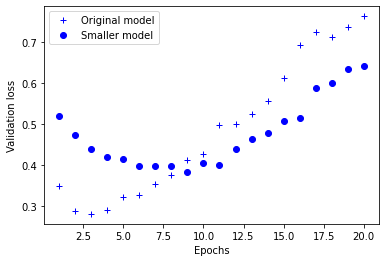

In [8]:
import matplotlib.pyplot as plt


# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 0.5461 - acc: 0.7898 - val_loss: 0.3489 - val_acc: 0.8522
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2291 - acc: 0.9097 - val_loss: 0.3039 - val_acc: 0.8769
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1236 - acc: 0.9559 - val_loss: 0.3297 - val_acc: 0.8847
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0759 - acc: 0.9829 - val_loss: 0.4767 - val_acc: 0.8746
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0918 - acc: 0.9851 - val_loss: 0.4666 - val_acc: 0.8796
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 9.1399e-04 - acc: 0.9999 - val_loss: 0.6795 - val_acc: 0.8822
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1985 - acc: 0.9860 - val_loss: 0.6276 - val_acc: 0.8713
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 5.3020

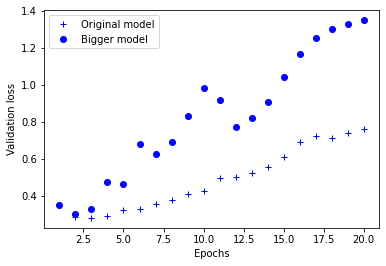

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


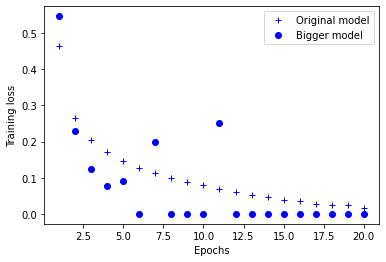

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 42ms/step - loss: 0.4867 - acc: 0.8221 - val_loss: 0.3935 - val_acc: 0.8676
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3183 - acc: 0.9036 - val_loss: 0.3413 - val_acc: 0.8868
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2737 - acc: 0.9203 - val_loss: 0.3378 - val_acc: 0.8852
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2549 - acc: 0.9266 - val_loss: 0.3648 - val_acc: 0.8733
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2403 - acc: 0.9335 - val_loss: 0.3434 - val_acc: 0.8842
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2321 - acc: 0.9352 - val_loss: 0.3561 - val_acc: 0.8785
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2255 - acc: 0.9384 - val_loss: 0.3622 - val_acc: 0.8772
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2226 - a

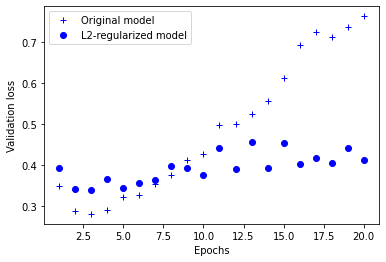

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [19]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 42ms/step - loss: 0.5624 - acc: 0.8220 - val_loss: 0.4341 - val_acc: 0.8717
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3818 - acc: 0.8889 - val_loss: 0.3733 - val_acc: 0.8862
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3353 - acc: 0.9046 - val_loss: 0.4016 - val_acc: 0.8666
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3202 - acc: 0.9092 - val_loss: 0.3579 - val_acc: 0.8875
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3087 - acc: 0.9125 - val_loss: 0.3606 - val_acc: 0.8865
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3000 - acc: 0.9167 - val_loss: 0.3599 - val_acc: 0.8857
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2938 - acc: 0.9185 - val_loss: 0.4007 - val_acc: 0.8714
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2874 - a

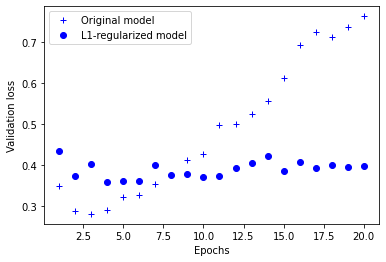

In [20]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [21]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [23]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 43ms/step - loss: 0.5692 - acc: 0.8191 - val_loss: 0.4408 - val_acc: 0.8711
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3868 - acc: 0.8886 - val_loss: 0.3819 - val_acc: 0.8842
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3428 - acc: 0.9010 - val_loss: 0.3654 - val_acc: 0.8869
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3254 - acc: 0.9071 - val_loss: 0.3595 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3138 - acc: 0.9109 - val_loss: 0.3601 - val_acc: 0.8878
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3064 - acc: 0.9138 - val_loss: 0.3620 - val_acc: 0.8856
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2961 - acc: 0.9184 - val_loss: 0.3644 - val_acc: 0.8857
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2906 - a

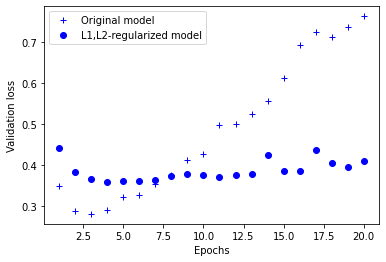

In [26]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [27]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [28]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 34ms/step - loss: 0.5718 - acc: 0.7044 - val_loss: 0.4195 - val_acc: 0.8690
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4128 - acc: 0.8316 - val_loss: 0.3261 - val_acc: 0.8792
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3354 - acc: 0.8713 - val_loss: 0.2829 - val_acc: 0.8885
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2857 - acc: 0.8979 - val_loss: 0.2789 - val_acc: 0.8870
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2543 - acc: 0.9112 - val_loss: 0.2787 - val_acc: 0.8870
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2244 - acc: 0.9226 - val_loss: 0.2904 - val_acc: 0.8878
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2007 - acc: 0.9312 - val_loss: 0.3101 - val_acc: 0.8822
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1876 - a

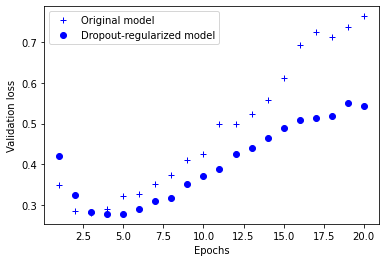

In [29]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()